<a href="https://colab.research.google.com/github/SabinSapota/SabinSapota/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resume Classification**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['UpdatedResumeDataSet.csv']))
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**resume classification on the basis of job categogy**

In [ ]:
df1=df.Category.value_counts().reset_index()
df1.columns=['Job Category','Count']
df1=df1.sort_values(by='Count',ascending=False)
df1

,Job Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
10,Data Science,40
11,Sales,40
12,Operations Manager,40


In [ ]:
fig=px.bar(data_frame=df1,x='Job Category',y='Count',text='Count')
fig.update_traces(textposition='outside')
fig['layout'].update(title={"text" : 'resume classification on the basis of job categogy','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top','font_family':'Arial Black'})
fig.show()

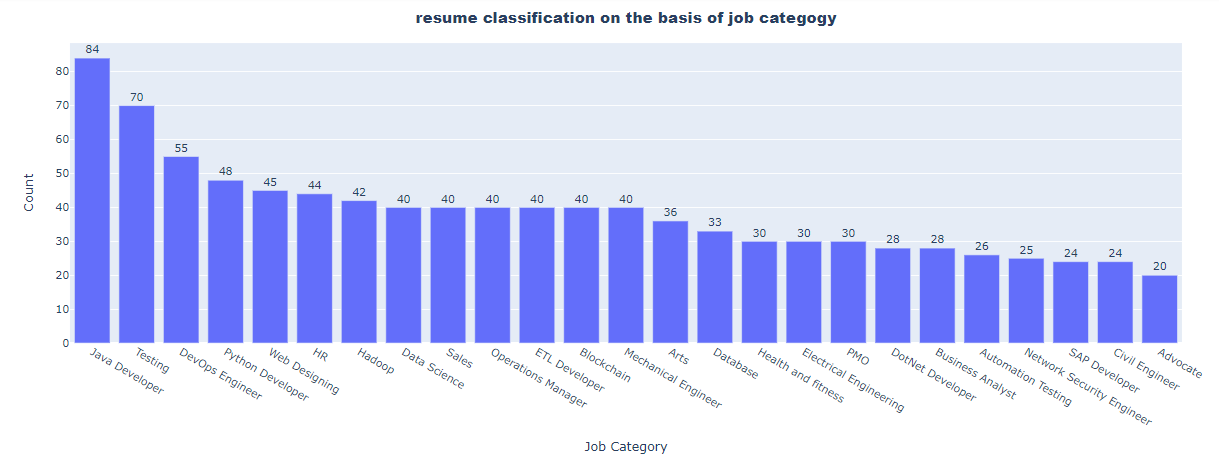

In [ ]:
px.pie(data_frame=df1,names='Job Category',values='Count',title='resume classification on the basis of job categogy(percentage)')

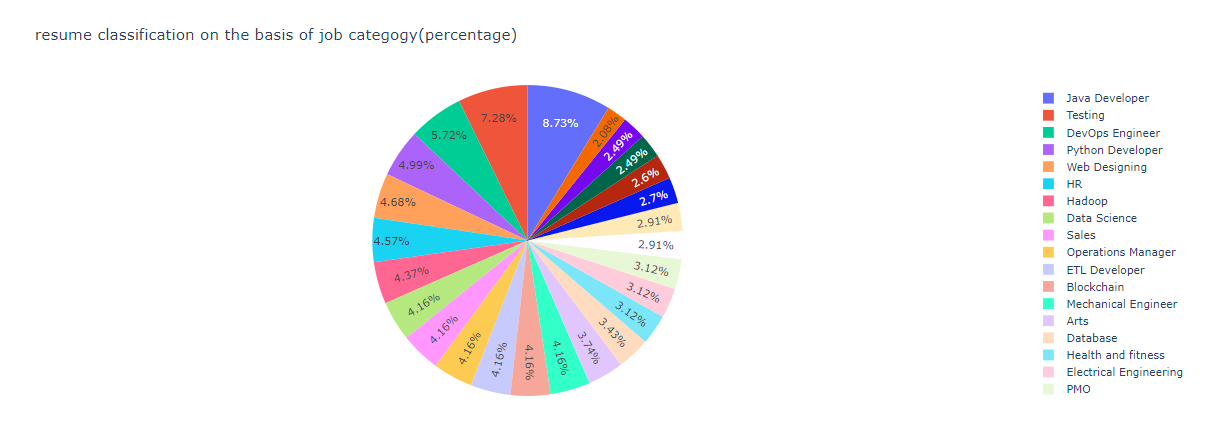

In [ ]:
#text cleaning
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...


In [ ]:
#label encoding for category
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,6,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skill Proficient in MS office ...
958,23,â Willingness to accept the challenges. â ...,Willingne to a ept the challenge Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerne...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


In [ ]:
#Preprocessing ‘cleaned_resume’ column
#using the ‘Tf-Idf’ method to get the vectors in this approach.
# here we will have ‘WordFeatures’ as vectors and ‘requiredTarget’ and target after this step.

requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
#model building
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [ ]:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99


In [ ]:
#We can also check the detailed classification report for each class or category.
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
          17       1.00    